Stock Market Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [7]:
dataset=pd.read_csv("NSE-TATAGLOBAL.csv")

In [9]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [10]:
dataset.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [13]:
print(dataset.shape)
print(len(dataset))

(2035, 8)
2035


In [14]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [16]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [17]:
dataset.sort_values(by='Date',ignore_index=True,inplace=True) #Sorting Values w.r.t the dates
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-09,121.65,123.65,120.20,122.70,123.00,2274887,2781.63
1,2010-01-10,121.30,124.00,121.30,123.60,123.50,711861,875.04
2,2010-01-11,126.00,128.40,123.00,124.50,124.55,1621553,2044.44
3,2010-01-12,113.50,116.00,113.00,114.50,114.75,628391,722.87
4,2010-02-08,117.30,118.50,116.60,118.10,117.30,663593,779.85
...,...,...,...,...,...,...,...,...
2030,2018-12-03,270.00,276.65,269.70,276.00,276.05,2583575,7052.02
2031,2018-12-04,273.90,277.80,271.65,273.90,273.85,2149205,5896.21
2032,2018-12-06,262.75,268.40,262.75,267.20,267.60,1206633,3209.40
2033,2018-12-07,270.40,272.45,264.35,264.50,265.20,2250217,6045.37


In [19]:
dataset_close = dataset.reset_index()['Close']
dataset_close

0       123.00
1       123.50
2       124.55
3       114.75
4       117.30
         ...  
2030    276.05
2031    273.85
2032    267.60
2033    265.20
2034    222.65
Name: Close, Length: 2035, dtype: float64

<AxesSubplot:>

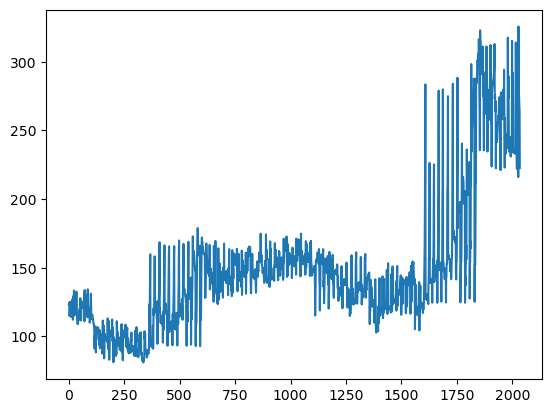

In [20]:
dataset_close.plot()

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
dataset1 = scale.fit_transform(np.array(dataset_close).reshape(-1,1))
dataset1

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.76245915],
       [0.75265523],
       [0.57883987]])

Spiltting the data into train and test

In [22]:
train_size = int(len(dataset1)*0.80)
test_size = len(dataset1)-train_size
train_data = dataset1[0:train_size,:]
test_data = dataset1[train_size:len(dataset1),:]

In [24]:
train_data

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.30187908],
       [0.34375   ],
       [0.59395425]])

In [25]:
test_data

array([[0.24918301],
       [0.24611928],
       [0.23611111],
       [0.24162582],
       [0.24183007],
       [0.24775327],
       [0.24775327],
       [0.24121732],
       [0.23815359],
       [0.23672386],
       [0.23325163],
       [0.17769608],
       [0.24877451],
       [0.25490196],
       [0.28982843],
       [0.30739379],
       [0.28860294],
       [0.3500817 ],
       [0.5126634 ],
       [0.58966503],
       [0.23917484],
       [0.24489379],
       [0.26041667],
       [0.26082516],
       [0.26756536],
       [0.26531863],
       [0.25388072],
       [0.28860294],
       [0.28676471],
       [0.27634804],
       [0.28431373],
       [0.28451797],
       [0.28267974],
       [0.28431373],
       [0.17769608],
       [0.30392157],
       [0.28227124],
       [0.34926471],
       [0.45894608],
       [0.50653595],
       [0.80923203],
       [0.28410948],
       [0.27982026],
       [0.2745098 ],
       [0.28288399],
       [0.29084967],
       [0.28737745],
       [0.290

In [26]:
time_step = 100
x_train,y_train = [],[]
for i in range(len(train_data)-time_step-1):
    a = train_data[i:(i+time_step),0]
    x_train.append(a)
    y_train.append(train_data[i+ time_step,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [27]:
x_test,y_test = [],[]
for i in range(len(test_data)-time_step-1):
    b = test_data[i:(i+time_step),0]
    x_test.append(b)
    y_test.append(test_data[i+time_step,0])
x_test,y_test = np.array(x_test),np.array(y_test)

In [28]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100)
Y_train shape : (1527,)
X_test shape  : (306, 100)
Y_test shape  : (306,)


In [29]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test  = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [30]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100, 1)
Y_train shape : (1527,)
X_test shape  : (306, 100, 1)
Y_test shape  : (306,)
